# Optimal transport on 1D synthetic data

Adapted from `pot_examples/plot_OT_1D.ipynb`, by Remi Flamary.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

## Generate data

In [3]:
def get_frame(mu, sigma, s_noise):
    
    # Compute Gaussian components
    x_1 = gauss(n, m=mu[0], s=sigma[0])
    x_2 = gauss(n, m=mu[1], s=sigma[1])
    
    # Add half-normal noise
    noise = s_noise * np.abs(np.random.randn(n))
    x_nn = x_1 + x_2 + noise
    
    return x_nn / np.sum(x_nn)

In [4]:
# Number of bins
n = 100

# Bin positions
x = np.arange(n, dtype=np.float64)

# Noise level
s_noise = 0.01

# Create two frames
a = get_frame([20, 80], [3, 5], s_noise)
b = get_frame([30, 75], [3, 5], s_noise)

# Loss matrix 
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M = M / np.median(M)

## Plot distributions and loss matrix

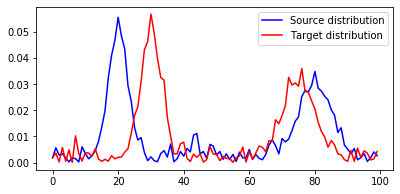

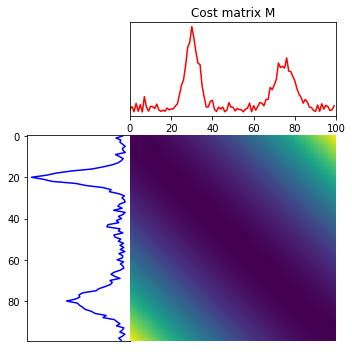

In [5]:
# Plot the distributions

pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

# Plot distributions and loss matrix

pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

Solve EMD
---------



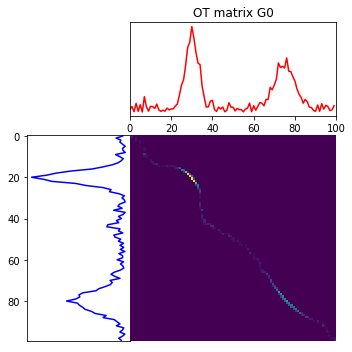

In [6]:
#%% EMD

G0 = ot.emd(a, b, M)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')

Solve Sinkhorn
--------------



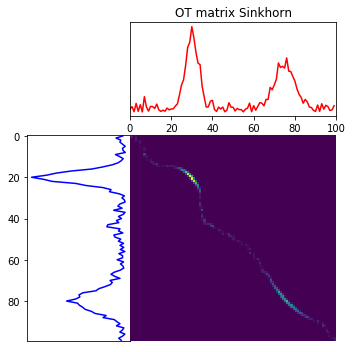

In [7]:
#%% Sinkhorn

lambd = 1e-3
Gs = ot.sinkhorn(a, b, M, lambd, verbose=False)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'OT matrix Sinkhorn')

pl.show()